In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
N = 1024
dt = 0.001  # fs = 1 / dt
f1, f2, f3 = 10, 60, 300

t = np.arange(0, N*dt, dt)
x = 3*np.sin(2*np.pi*f1*t) + 0.3*np.sin(2*np.pi*f2*t) + 0.2*np.sin(2*np.pi*f3*t)

In [3]:
filter = signal.firwin(numtaps=101, cutoff=100, fs=1/dt, pass_zero=False)
y = signal.lfilter(filter, 1, x)

f = np.fft.fft(x)
F = np.fft.fft(y)
freq = np.fft.fftfreq(N, d=dt)

amp = np.abs(f/(N/2))
Amp = np.abs(F/(N/2))

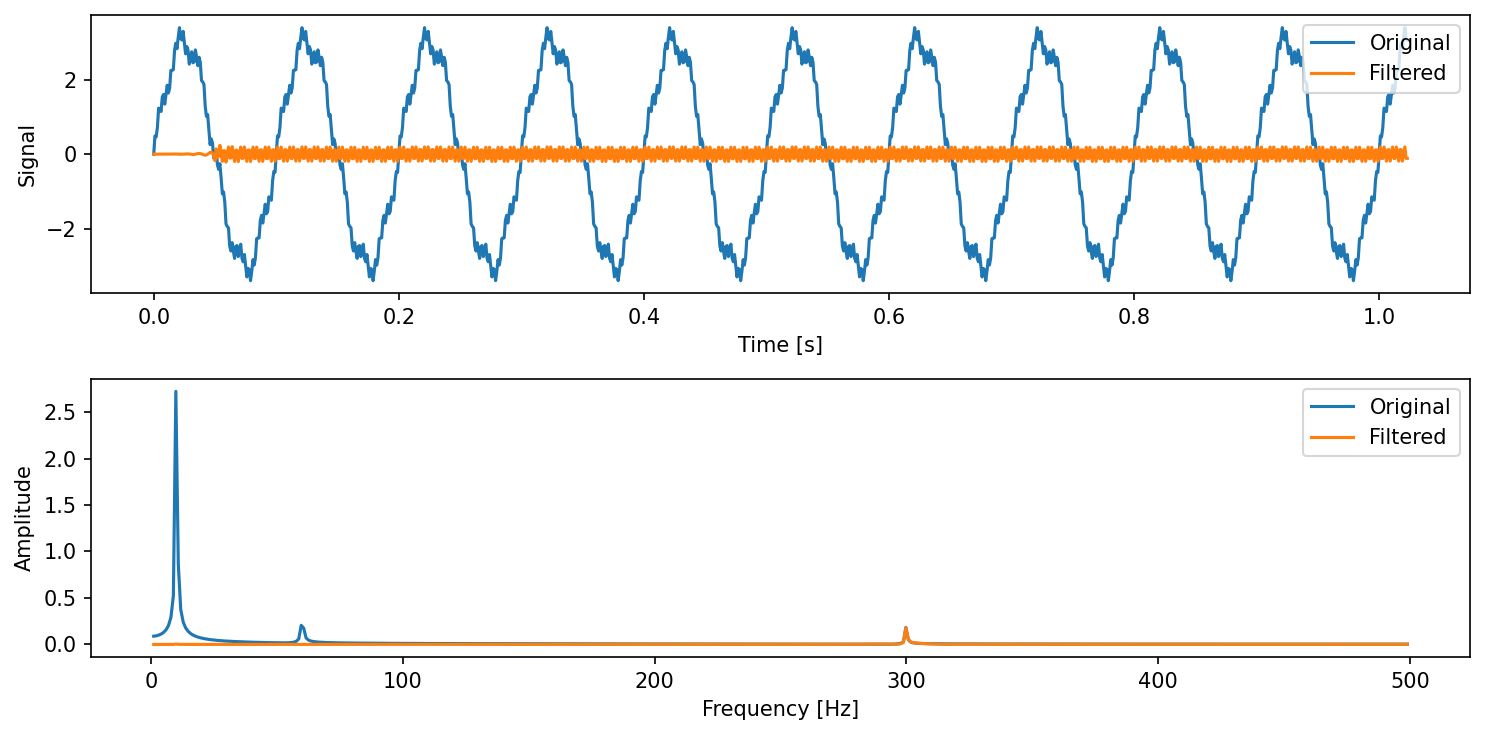

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5), dpi=150)

ax[0].plot(t, x, label="Original")
ax[0].plot(t, y, label="Filtered")
ax[0].set_xlabel("Time [s]")
ax[0].set_ylabel("Signal")
ax[0].legend()

ax[1].plot(freq[1:int(N/2)], amp[1:int(N/2)], label="Original")
ax[1].plot(freq[1:int(N/2)], Amp[1:int(N/2)], label="Filtered")
ax[1].set_xlabel("Frequency [Hz]")
ax[1].set_ylabel("Amplitude")
ax[1].legend()

fig.tight_layout()
fig.show()